In [1]:
#Importations
from implementations import *
from helpers import *
import matplotlib.pyplot as plt
import numpy as np
from functions import *

#Loading of data
x_train, x_test, y_train, train_ids, test_ids = load_csv_data('dataset_to_release/', sub_sample=False)

In [2]:
#Cleaning of data
x_train1, y_train1, x_test1 = clean_data(x_train, y_train, x_test)

306
265
Shape of x_train after cleaning:  (328135, 266)
Shape of y_train after cleaning:  (328135,)
Shape of x_test after cleaning:  (109379, 266)


In [3]:
#Expansion of data
categorical_columns, numeric_columns, _, _ = separate_column_types(x_train1, max_nb=10)

x_train2=build_numerical_cos(x_train1, categorical_columns, numeric_columns)
x_test2=build_numerical_cos(x_test1, categorical_columns, numeric_columns)

#Spliting of data
x_tr, y_tr, x_te, y_te = split_data(x_train2, y_train1)

#Creation of balanced subsets
sub_y_trains, sub_x_trains = creation_subsets(y_tr, x_tr)

print('Final x_train : ', x_train2.shape)
print('Final y_train : ', y_train1.shape)
print('Final x_test : ', x_test2.shape)

Final x_train :  (328135, 347)
Final y_train :  (328135,)
Final x_test :  (109379, 347)


## LS

In [4]:
weights_LS = []

for i in range(len(sub_x_trains)):
    w,_ = least_squares(sub_y_trains[i], sub_x_trains[i])
    weights_LS.append(w)
    
w_LS = np.mean(weights_LS, axis = 0)

print('Test of Least Squares : ')
test(w_LS, x_te, y_te)

Test of Least Squares : 
Threshold :  0.6060606060606061
Accuracy :  86.87430478309233
F1 score :  0.40527478597072636


## RIDGE

In [5]:
lambdas = np.linspace(0,0.1,20)  
weights_RIDGE = []
losses_te = []
acc = []
f = []

for lambda_ in lambdas:
    weights_lambda = []
    for i in range(len(sub_x_trains)):
        w,_ = ridge_regression(sub_y_trains[i], sub_x_trains[i], lambda_)
        weights_lambda.append(w)
        
    weights_RIDGE.append(np.mean(weights_lambda, axis = 0))
    loss = compute_loss(y_te, x_te, np.mean(weights_lambda, axis = 0))
    losses_te.append(loss)
    f.append(compute_f1(y_te, sigmoid_prediction_ (x_te, np.mean(weights_lambda, axis = 0), threshold=0.59)))
    acc.append(accuracy(y_te, sigmoid_prediction_ (x_te, np.mean(weights_lambda, axis = 0), threshold=0.59)))

print('Test of Ridge Regression based on f1: ')
    
best_index = f.index(max(f))
print('Smallest loss : ',losses_te[best_index])
print('Best lambda : ',lambdas[best_index])
w_RIDGE_f1 = weights_RIDGE[best_index]

test(w_RIDGE_f1, x_te, y_te)

print('Test of Ridge Regression based on loss: ')
    
best_index = losses_te.index(min(losses_te))
print('Smallest loss : ',losses_te[best_index])
print('Best lambda : ',lambdas[best_index])
w_RIDGE_loss = weights_RIDGE[best_index]

test(w_RIDGE_loss, x_te, y_te)

Test of Ridge Regression based on f1: 
Smallest loss :  0.35404421723261814
Best lambda :  0.005263157894736842
Threshold :  0.595959595959596
Accuracy :  86.45984122388651
F1 score :  0.4057777183362311
Test of Ridge Regression based on loss: 
Smallest loss :  0.35336003958415385
Best lambda :  0.05789473684210526
Threshold :  0.595959595959596
Accuracy :  86.6564066618922
F1 score :  0.40375842581875127


-----

In [6]:
w_initial = w_LS

In [ ]:
w_initial = w_RIDGE_f1

## MSE GD

In [7]:
losses_te = []
weights_MS = []
f = []
acc = []
max_iters = 10
gammas = np.linspace(0,1,50)

for gamma in gammas :
    weights_sub = []
    for i in range(len(sub_x_trains)):
        w = w_initial
        w, loss = mean_squared_error_gd(sub_y_trains[i], sub_x_trains[i], w, max_iters, gamma)
        weights_sub.append(w)
    weights_MS.append(np.mean(weights_sub, axis = 0))
    losses_te.append(compute_loss(y_te, x_te, np.mean(weights_sub, axis = 0)))
    f.append(compute_f1(y_te, sigmoid_prediction_ (x_te, np.mean(weights_sub, axis = 0), threshold=0.6)))
    acc.append(accuracy(y_te, sigmoid_prediction_ (x_te, np.mean(weights_sub, axis = 0), threshold=0.6)))

print('Test of Mean squared error gradient descent based on f1: ')    
    
best_index = f.index(max(f))
print('Best gamma : ', gammas[best_index])
print('Smallest loss : ', losses_te[best_index])
w_MS_f1 = weights_MS[best_index]   

test(w_MS_f1, x_te, y_te)

print('Test of Mean squared error gradient descent based on loss: ')    
    
best_index = losses_te.index(min(losses_te))
print('Best gamma : ', gammas[best_index])
print('Smallest loss : ', losses_te[best_index])
w_MS_loss = weights_MS[best_index]   

test(w_MS_loss, x_te, y_te)

Test of Mean squared error gradient descent based on f1: 
Best gamma :  0.0
Smallest loss :  0.3682348248457752
Threshold :  0.6060606060606061
Accuracy :  86.87430478309233
F1 score :  0.40527478597072636
Test of Mean squared error gradient descent based on loss: 
Best gamma :  0.02040816326530612
Smallest loss :  0.3628253183279953
Threshold :  0.595959595959596
Accuracy :  86.27546589056332
F1 score :  0.4055177876047786


## MSE SGD

In [9]:
losses_te = []
weights_SMS = []
f = []
acc = []
max_iters = 10
gammas = np.linspace(0,1,50)

for gamma in gammas :
    weights_sub = []
    for i in range(len(sub_x_trains)):
        w = w_initial
        w,_ = mean_squared_error_sgd(sub_y_trains[i], sub_x_trains[i], w, max_iters, gamma)
        weights_sub.append(w)
    weights_SMS.append(np.mean(weights_sub, axis = 0))    
    losses_te.append(compute_loss(y_te, x_te, np.mean(weights_sub, axis = 0)))
    f.append(compute_f1(y_te, sigmoid_prediction_(x_te, np.mean(weights_sub, axis = 0), threshold=0.6)))
    acc.append(accuracy(y_te, sigmoid_prediction_ (x_te, np.mean(weights_sub, axis = 0), threshold=0.6)))

print('Test of Mean squared error stoch gradient descent based on f1: ')    
    
best_index = f.index(max(f))
print('Best gamma : ', gammas[best_index])
print('Smallest loss : ', losses_te[best_index])
w_SMS_f1 = weights_MS[best_index]   

test(w_SMS_f1, x_te, y_te)

print('Test of Mean squared error stoch gradient descent based on loss: ')    
    
best_index = losses_te.index(min(losses_te))
print('Best gamma : ', gammas[best_index])
print('Smallest loss : ', losses_te[best_index])
w_SMS_loss = weights_MS[best_index]   

test(w_SMS_loss, x_te, y_te)

/Users/valentinedelevaux/Desktop/EPFL/GitHub/Project_1_ML/DONE/implementations.py:325: RuntimeWarning: overflow encountered in exp
  return 1/ (1 + np.exp(-t))


Test of Mean squared error stoch gradient descent based on f1: 
Best gamma :  0.0
Smallest loss :  0.3682348248457752
Threshold :  0.6060606060606061
Accuracy :  86.87430478309233
F1 score :  0.40527478597072636
Test of Mean squared error stoch gradient descent based on loss: 
Best gamma :  0.0
Smallest loss :  0.3682348248457752
Threshold :  0.6060606060606061
Accuracy :  86.87430478309233
F1 score :  0.40527478597072636


## LOG

In [10]:
losses_te = []
weights_LOG = []
f = []
acc = []

nb_steps = 15
gammas = np.linspace(0,1,50)

for gamma in gammas :
    weights_gamma = []
    for i in range(len(sub_x_trains)):
        w = w_initial
        w,_ = logistic_regression(sub_y_trains[i], sub_x_trains[i], w, nb_steps, gamma)
            
        weights_gamma.append(w)
        
    weights_LOG.append(np.mean(weights_gamma, axis = 0))
    losses_te.append(compute_loss(y_te, x_te, np.mean(weights_gamma, axis = 0)))
    f.append(compute_f1(y_te, sigmoid_prediction_(x_te, np.mean(weights_gamma, axis = 0), threshold=0.6)))
    acc.append(accuracy(y_te, sigmoid_prediction_ (x_te, np.mean(weights_gamma, axis = 0), threshold=0.6)))
 
print('Test of Logistic Regression based on f1: ')
best_index = f.index(max(f))
print('Best gamma : ', gammas[best_index])
print('Smallest loss : ', losses_te[best_index])
w_LOG_f1 = weights_LOG[best_index]  

test(w_LOG_f1, x_te, y_te) 

print('Test of Logistic Regression based on loss: ')
    
best_index = losses_te.index(min(losses_te))
print('Best gamma : ', gammas[best_index])
print('Smallest loss : ', losses_te[best_index])
w_LOG_loss = weights_LOG[best_index]  

test(w_LOG_loss, x_te, y_te) 

Test of Logistic Regression based on f1: 
Best gamma :  0.0
Smallest loss :  0.3682348248457752
Threshold :  0.6060606060606061
Accuracy :  86.87430478309233
F1 score :  0.40527478597072636
Test of Logistic Regression based on loss: 
Best gamma :  0.0
Smallest loss :  0.3682348248457752
Threshold :  0.6060606060606061
Accuracy :  86.87430478309233
F1 score :  0.40527478597072636


## REG LOG

In [12]:
nb_steps = 15
lambdas = np.linspace(0,0.1,10)
gammas = np.linspace(0,0.2,10)
weights_RLOG = np.zeros((len(lambdas),len(gammas), x_tr.shape[1]))
losses_te = np.zeros((len(lambdas),len(gammas)))
losses_tr = np.zeros((len(lambdas),len(gammas)))
f = np.zeros((len(lambdas),len(gammas)))

for i, lambda_ in enumerate(lambdas):
    for j, gamma in enumerate(gammas):
        weights_sub = []
        for a in range(len(sub_x_trains)):
            w = w_initial
            w, _ = reg_logistic_regression(sub_y_trains[a], sub_x_trains[a],lambda_, w, nb_steps, gamma)
            weights_sub.append(w)

        weights_RLOG[i,j] = np.mean(weights_sub, axis = 0)
        loss_te = compute_loss(y_te, x_te, np.mean(weights_sub, axis = 0))
        loss_tr = compute_loss(y_tr, x_tr, np.mean(weights_sub, axis = 0))
        losses_te[i][j] = loss_te 
        losses_tr[i][j] = loss_tr 
        f[i][j] = compute_f1(y_te, sigmoid_prediction_(x_te, np.mean(weights_sub, axis = 0), 0.57))

print('Test of regularized logistic regression based on f1:')        
best_index = np.unravel_index(np.argmax(f), losses_te.shape)
row_index, col_index = best_index
best_weight = weights_RLOG[row_index][col_index]
print('Best lambda : ', lambdas[row_index])
print('Best gamma : ', gammas[col_index])
print('Smallest loss : ', losses_te[best_index])
w_RLOG_f1 = best_weight

test(w_RLOG_f1, x_te, y_te)
                             
print('Test of regularized logistic regression based on loss:')        
best_index = np.unravel_index(np.argmin(losses_te), losses_te.shape)
row_index, col_index = best_index
best_weight = weights_RLOG[row_index][col_index]
print('Best lambda : ', lambdas[row_index])
print('Best gamma : ', gammas[col_index])
print('Smallest loss : ', losses_te[best_index])
w_RLOG_loss = best_weight

test(w_RLOG_loss, x_te, y_te)

Test of regularized logistic regression based on f1:
Best lambda :  0.08888888888888889
Best gamma :  0.022222222222222223
Smallest loss :  0.3352527545394407
Threshold :  0.5757575757575758
Accuracy :  85.42215856278665
F1 score :  0.4064768285873814
Test of regularized logistic regression based on loss:
Best lambda :  0.08888888888888889
Best gamma :  0.022222222222222223
Smallest loss :  0.3352527545394407
Threshold :  0.5757575757575758
Accuracy :  85.42215856278665
F1 score :  0.4064768285873814


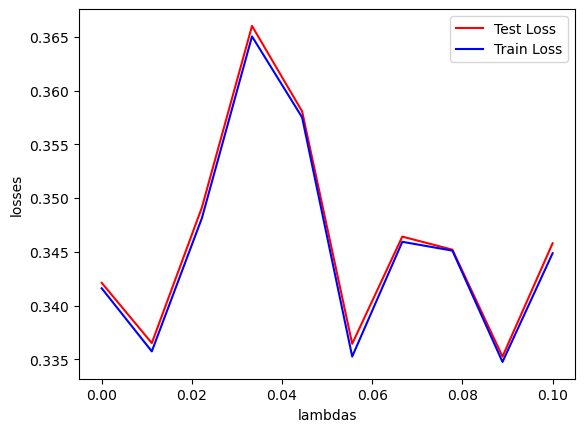

In [21]:
plt.plot(lambdas, losses_te[:, col_index], color = 'red', label = 'Test Loss')
plt.plot(lambdas, losses_tr[:,col_index], color = 'blue', label = 'Train Loss')
plt.legend()
plt.xlabel('lambdas')
plt.ylabel('losses')
plt.show()

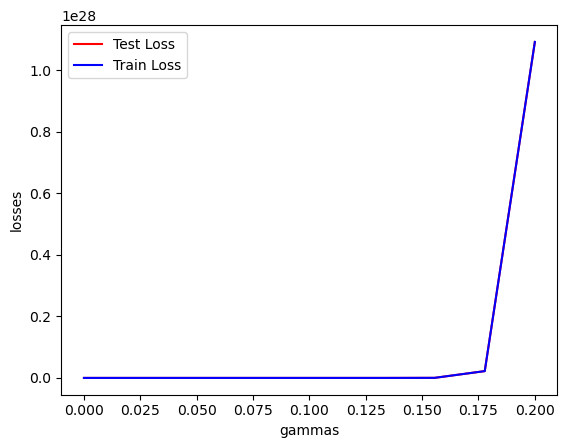

In [24]:
plt.plot(gammas, losses_te[row_index, :], color = 'red', label = 'Test Loss')
plt.plot(gammas, losses_tr[row_index,:], color = 'blue', label = 'Train Loss')
plt.legend()
plt.xlabel('gammas')
plt.ylabel('losses')
plt.show()